In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import pandas as pd


przepisać równanie ribby
skopiować dane ribby dotyczące chorych

In [2]:
def to_volume(mtd):
    return math.pi * mtd**3/6

In [3]:

# df =  pd.read_csv('data/fig1_mtd_pcv_00.csv',names = ['t','mtd','id'],header=None)
df =  pd.read_csv('data/fig1_mtd_pcv_00.csv',names = ['t','mtd','id'])
df1 = pd.read_csv('data/fig1_mtd_pcv_01.csv',names = ['t','mtd','id'])
df.id.unique()

array([0, 1, 2, 3])

In [ ]:
df1.id.unique()

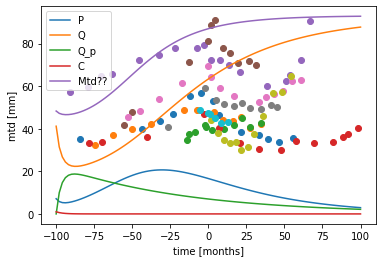

In [21]:


"""
P  #proliferative tissue
C  #drug concentration
Q_p =  damaged quiescent tissue
Q     quiescent tissue
K # fixed maximal tumor size
C  # drug concentration in plasma

1/lambda_p The basic doubling times of the size of the proliferative tissue
"""


def model(y,t):
    lambda_p = 0.121 # the rate constant of growth used in the logistic expression for the expansion of proliferative tissue. Tumor specific
    delta_qp = 0.00867 # rate constant for elimination of the damaged quiescent tissue.
    gamma = 0.729 # Treatment specific
    gamma_q  = gamma # damages in proliferative tissue. Treatment specific
    gamma_p = gamma  # damages in quiescent tissue. Treatment specific
    KDE = 0.24 # KDE is the rate constant for the decay of the PCV concentration in plasma, denoted C.
    k_qpp = 0.0031 # the rate constant for transfer from damaged quiescent tissue to proliferative tissue,
    k_pq = 0.0295 # the rate constant for transition from proliferation to quiescence. Tumor specific
    K = 100.0 # fixed maximal tumor size 100 mm
    
    [P,Q, Q_p, C] = y

    dCdt = -KDE * C
    dPdt = lambda_p * P*(1 - (P + Q + Q_p)/K) + k_qpp * Q_p - k_pq * P - gamma_p * C * KDE * P
    dQdt = k_pq * P - gamma_q * C * KDE * Q
    dQ_pdt = gamma_q * C *KDE * Q - k_qpp * Q_p - delta_qp * Q_p
    return [dPdt,dQdt,dQ_pdt,dCdt]

P0 = 7.13
Q0 = 41.2
Q_p0 = 0.0 # We assumed Q_p0 = 0 when t=0 in the absence of treatment.
C =1.0 #??

t = np.linspace(-100,100,100)

y = odeint(model,[P0,Q0,Q_p0,C],t)

# print(y)
plt.plot(t,y[:,0],label="P")
plt.plot(t,y[:,1],label="Q")
plt.plot(t,y[:,2],label="Q_p")
plt.plot(t,y[:,3],label="C")
plt.plot(t,y[:,0]+y[:,1]+y[:,2],label="Mtd??")

plt.legend(loc="upper left")

for i in df.id.unique():
    patient = df[df.id ==i]
    plt.scatter(patient.t,patient.mtd)
    
for i in df1.id.unique():
    patient = df1[df1.id ==i]
    plt.scatter(patient.t,patient.mtd)


plt.xlabel("time [months]")
plt.ylabel("mtd [mm]")

plt.show()


[ 3.25227964  2.75628528  2.63524883  2.70818644  2.90279022  3.18622076
  3.5423382   3.96298917  4.44420846  4.98433997  5.58297666  6.24027789
  6.95647313  7.7314652   8.56449317  9.4538388  10.39657419 11.38835636
 12.42328023 13.49380354 14.59075717 15.70345115 16.81988064 17.92702863
 19.0112523  20.05873099 21.05594677 21.99016346 22.84987075 23.62516101
 24.30801456 24.89248263 25.37475903 25.75314891 26.02794772 26.20124653
 26.27669118 26.25920951 26.15473045 25.96991    25.71187643 25.38800348
 25.00571489 24.57232356 24.09490382 23.58019483 23.03453149 22.46379942
 21.87340995 21.26829105 20.6528912  20.03119277 19.40673238 18.78262601
 18.1615971  17.54600634 16.93788182 16.33894881 15.75065884 15.1742172
 14.61060898 14.06062327 13.52487555 13.00382827 12.49780954 12.00703014
 11.53159885 11.07153629 10.62678722 10.19723157  9.78269448  9.38295456
  8.99775202  8.62679531  8.26976713  7.9263297   7.59612937  7.27880057
  6.97396938  6.68125652  6.40027995  6.13065715  5.

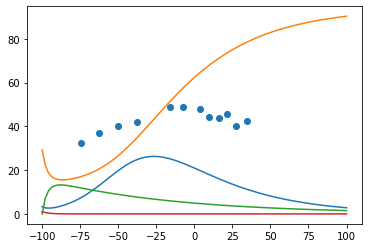

In [40]:
P0 = 0.1*list(patient.mtd)[0]
Q0 = 0.9*list(patient.mtd)[0]
Q_p0 = 0.0 # We assumed Q_p0 = 0 when t=0 in the absence of treatment.
C =1.0 #??

t = np.linspace(-100,100,100)

y = odeint(model,[P0,Q0,Q_p0,C],t)

# print(y)

print(y[:,0])
plt.scatter(list(patient.t),list(patient.mtd))
plt.plot(t,y)

In [23]:
# df = df.sort(t)
patient = df[df.id ==1]
list(patient.t)[0]

-74.21524663677128

In [24]:
df

,t,mtd,id
0,-84.080717,35.106383,0
1,-43.273543,39.969605,0
2,-31.614350,43.465046,0
3,-23.542601,47.112462,0
4,-12.107623,55.167173,0
5,-4.708520,56.838906,0
6,3.363229,53.039514,0
7,7.174888,46.656535,0
8,21.524664,38.297872,0
9,33.408072,36.930091,0
